In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A":[1, np.nan, 3, 4, 5],
        "B":[6, 7, 8, np.nan, 10],
        "C":[11, 12, 13, 14, 15]
    }
)

df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [4]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [24]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [26]:
df = pd.DataFrame(
    {
        "A":[1, 2, 3, 4, 5],
        "B":["a", "b", "a", "b", "c"]
    }
)

df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["B"])
le.transform(df["B"])

array([0, 1, 0, 1, 2])

In [28]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

df_ohe = df.copy()
ct = ColumnTransformer([("B_x", CountVectorizer(analyzer=lambda x: [x]), "B")],
    remainder="passthrough")

ct.fit_transform(df_ohe)

array([[1, 0, 0, 1],
       [0, 1, 0, 2],
       [1, 0, 0, 3],
       [0, 1, 0, 4],
       [0, 0, 1, 5]])

In [32]:
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 400, 500, 800]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [34]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

In [35]:
from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

In [36]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print("X:")
print(X[:5, :])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


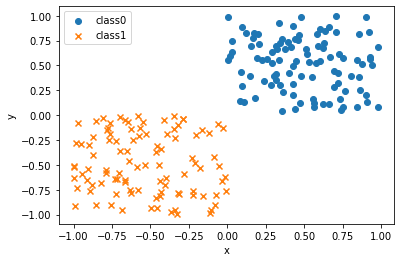

In [40]:
import matplotlib.pyplot as plt
np.random.seed(123)

X0 = np.random.uniform(size=(100, 2))
y0 = np.repeat(0, 100)

X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
y1 = np.repeat(1, 100)

fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker="o", label="class0")
ax.scatter(X1[:, 0], X1[:, 1], marker="x", label="class1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [48]:
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1 ):
    svc = SVC(kernel=kernel, C=C)

    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1], marker="o", label="class0")
    ax.scatter(X1[:, 0], X1[:, 1], marker="x", label="class1")

    xx, yy = np.meshgrid(np.linspace(xmin, xmax,100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
            colors="k", levels=[-1, 0, 1],
            alpha=0.5, linestyles=["--", "-", "--"])

    ax.scatter(svc.support_vectors_[:, 0],
            svc.support_vectors_[:, 1],
            s=250, facecolors="none",
            edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    
    plt.show()

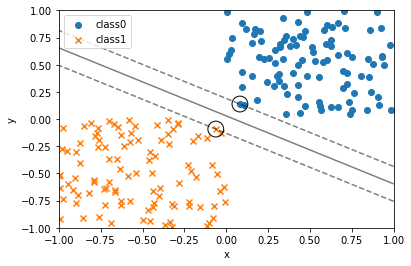

In [49]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=1e6)

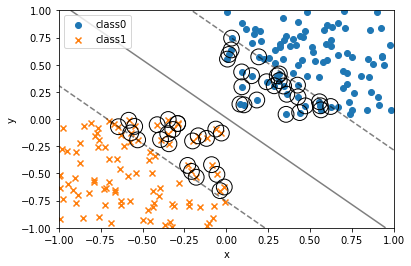

In [50]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=0.1)